In [1]:
%pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [2]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import r2_score

from sklearn.preprocessing import StandardScaler
from scipy import stats
import plotly.graph_objects as go
import plotly.express as px  # For easier rendering
import plotly.io as pio
from sklearn.model_selection import train_test_split
from tensorflow.keras import models, layers
from tensorflow.keras.models import Sequential  # Import Sequential
from tensorflow.keras import Model  # Import Model
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.optimizers import Adam



In [3]:
df = pd.read_csv("GOOG.csv")
df

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2016-06-14 00:00:00+00:00,718.27,722.470,713.1200,716.48,1306065,718.27,722.470,713.1200,716.48,1306065,0.0,1.0
1,GOOG,2016-06-15 00:00:00+00:00,718.92,722.980,717.3100,719.00,1214517,718.92,722.980,717.3100,719.00,1214517,0.0,1.0
2,GOOG,2016-06-16 00:00:00+00:00,710.36,716.650,703.2600,714.91,1982471,710.36,716.650,703.2600,714.91,1982471,0.0,1.0
3,GOOG,2016-06-17 00:00:00+00:00,691.72,708.820,688.4515,708.65,3402357,691.72,708.820,688.4515,708.65,3402357,0.0,1.0
4,GOOG,2016-06-20 00:00:00+00:00,693.71,702.480,693.4100,698.77,2082538,693.71,702.480,693.4100,698.77,2082538,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,GOOG,2021-06-07 00:00:00+00:00,2466.09,2468.000,2441.0725,2451.32,1192453,2466.09,2468.000,2441.0725,2451.32,1192453,0.0,1.0
1254,GOOG,2021-06-08 00:00:00+00:00,2482.85,2494.495,2468.2400,2479.90,1253253,2482.85,2494.495,2468.2400,2479.90,1253253,0.0,1.0
1255,GOOG,2021-06-09 00:00:00+00:00,2491.40,2505.000,2487.3300,2499.50,1006337,2491.40,2505.000,2487.3300,2499.50,1006337,0.0,1.0
1256,GOOG,2021-06-10 00:00:00+00:00,2521.60,2523.260,2494.0000,2494.01,1561733,2521.60,2523.260,2494.0000,2494.01,1561733,0.0,1.0


In [4]:
df['date'] = pd.to_datetime(df['date']).dt.date
df

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2016-06-14,718.27,722.470,713.1200,716.48,1306065,718.27,722.470,713.1200,716.48,1306065,0.0,1.0
1,GOOG,2016-06-15,718.92,722.980,717.3100,719.00,1214517,718.92,722.980,717.3100,719.00,1214517,0.0,1.0
2,GOOG,2016-06-16,710.36,716.650,703.2600,714.91,1982471,710.36,716.650,703.2600,714.91,1982471,0.0,1.0
3,GOOG,2016-06-17,691.72,708.820,688.4515,708.65,3402357,691.72,708.820,688.4515,708.65,3402357,0.0,1.0
4,GOOG,2016-06-20,693.71,702.480,693.4100,698.77,2082538,693.71,702.480,693.4100,698.77,2082538,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,GOOG,2021-06-07,2466.09,2468.000,2441.0725,2451.32,1192453,2466.09,2468.000,2441.0725,2451.32,1192453,0.0,1.0
1254,GOOG,2021-06-08,2482.85,2494.495,2468.2400,2479.90,1253253,2482.85,2494.495,2468.2400,2479.90,1253253,0.0,1.0
1255,GOOG,2021-06-09,2491.40,2505.000,2487.3300,2499.50,1006337,2491.40,2505.000,2487.3300,2499.50,1006337,0.0,1.0
1256,GOOG,2021-06-10,2521.60,2523.260,2494.0000,2494.01,1561733,2521.60,2523.260,2494.0000,2494.01,1561733,0.0,1.0


In [5]:
df.drop(columns=['symbol', 'adjClose', 'adjHigh', 'adjLow', 'adjOpen', 'adjVolume', 'divCash', 'splitFactor'], axis=1,inplace=True)
df


,date,close,high,low,open,volume
0,2016-06-14,718.27,722.470,713.1200,716.48,1306065
1,2016-06-15,718.92,722.980,717.3100,719.00,1214517
2,2016-06-16,710.36,716.650,703.2600,714.91,1982471
3,2016-06-17,691.72,708.820,688.4515,708.65,3402357
4,2016-06-20,693.71,702.480,693.4100,698.77,2082538
...,...,...,...,...,...,...
1253,2021-06-07,2466.09,2468.000,2441.0725,2451.32,1192453
1254,2021-06-08,2482.85,2494.495,2468.2400,2479.90,1253253
1255,2021-06-09,2491.40,2505.000,2487.3300,2499.50,1006337
1256,2021-06-10,2521.60,2523.260,2494.0000,2494.01,1561733


In [6]:
df.duplicated().values.any()

False

In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1258 non-null   object 
 1   close   1258 non-null   float64
 2   high    1258 non-null   float64
 3   low     1258 non-null   float64
 4   open    1258 non-null   float64
 5   volume  1258 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 59.1+ KB


In [8]:
df.describe()

,close,high,low,open,volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,1216.317067,1227.430934,1204.176430,1215.260779,1.601590e+06
std,383.333358,387.570872,378.777094,382.446995,6.960172e+05
min,668.260000,672.300000,663.284000,671.000000,3.467530e+05
25%,960.802500,968.757500,952.182500,959.005000,1.173522e+06
50%,1132.460000,1143.935000,1117.915000,1131.150000,1.412588e+06
75%,1360.595000,1374.345000,1348.557500,1361.075000,1.812156e+06
max,2521.600000,2526.990000,2498.290000,2524.920000,6.207027e+06


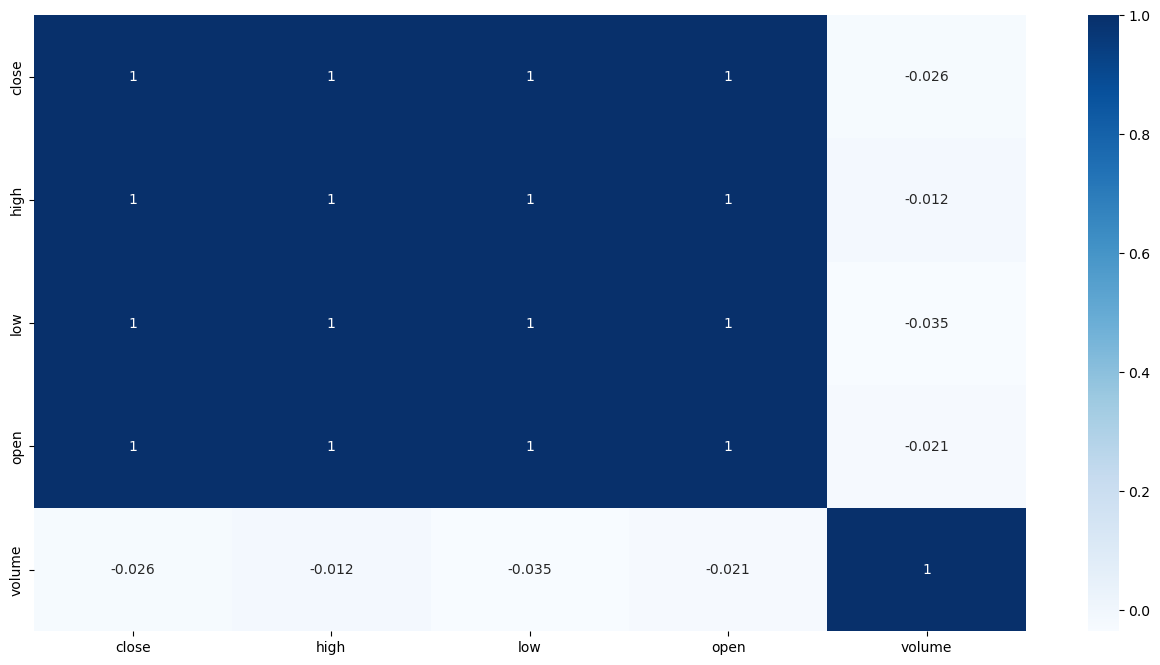

In [9]:
numeric_df = df.select_dtypes(include=['number'])
correlations = numeric_df.corr()
plt.figure(figsize=(16,8))
sns.heatmap(numeric_df.corr(), cmap="Blues", annot=True)
plt.show()

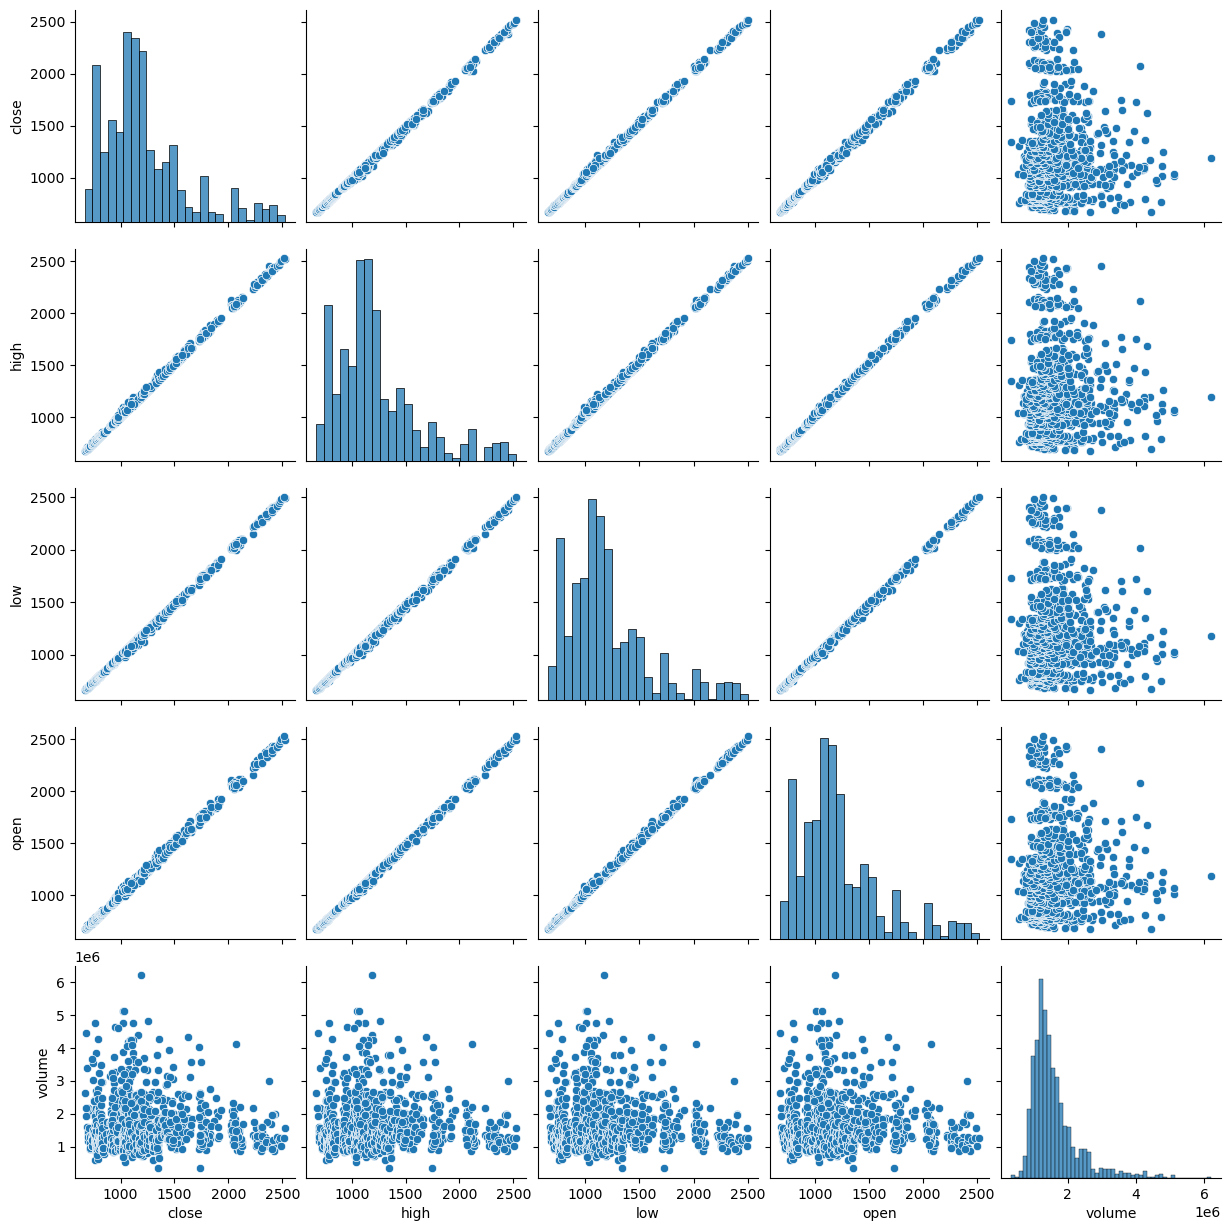

In [10]:
sns.pairplot(df)


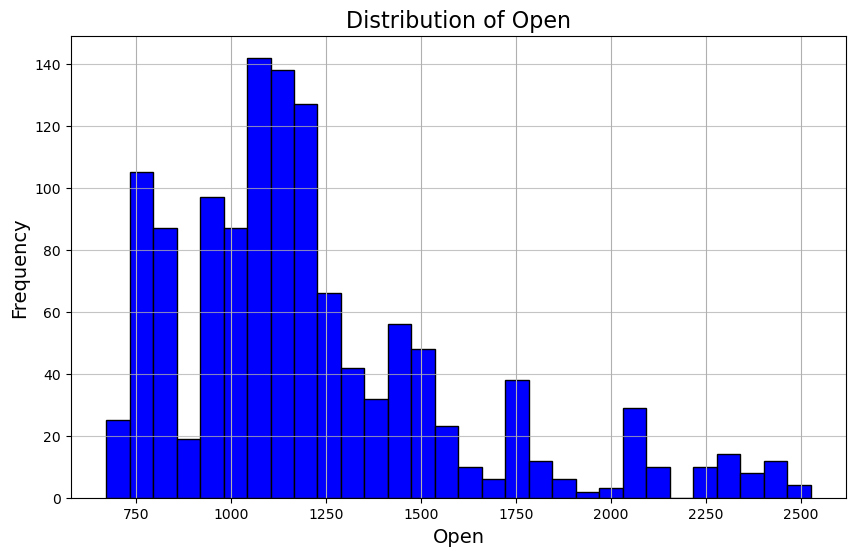

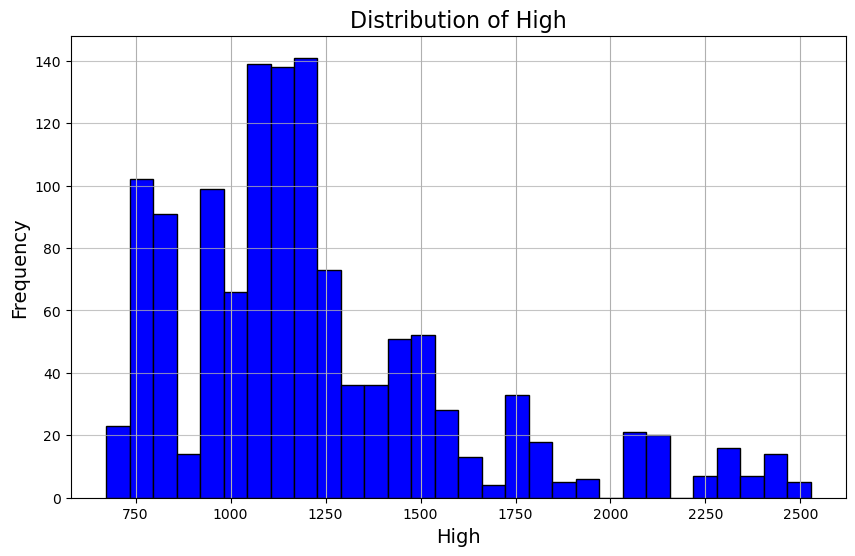

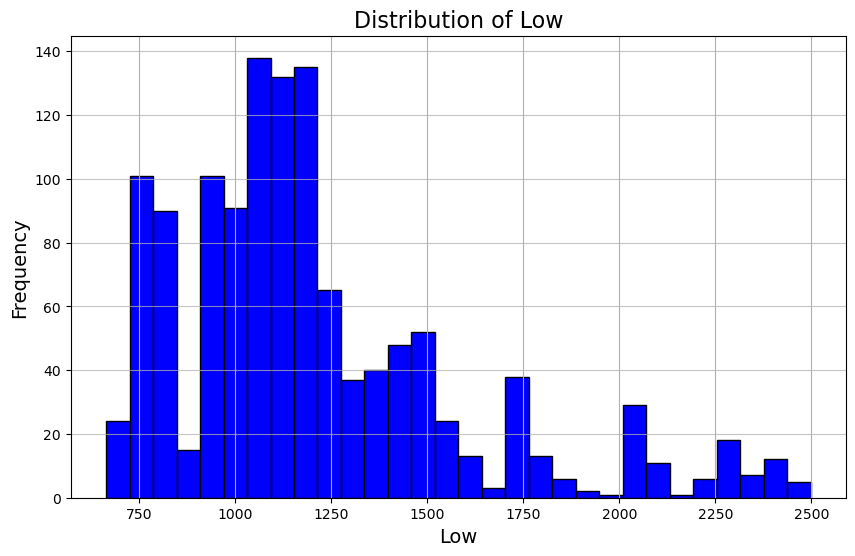

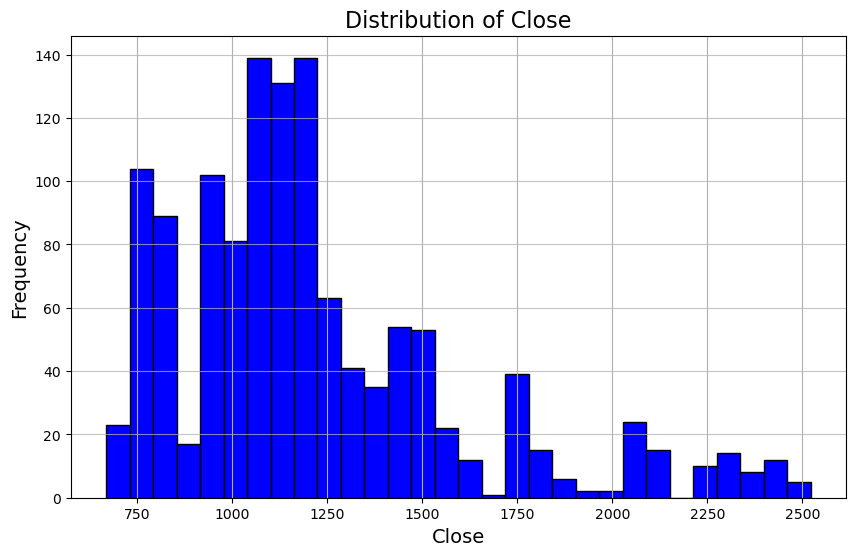

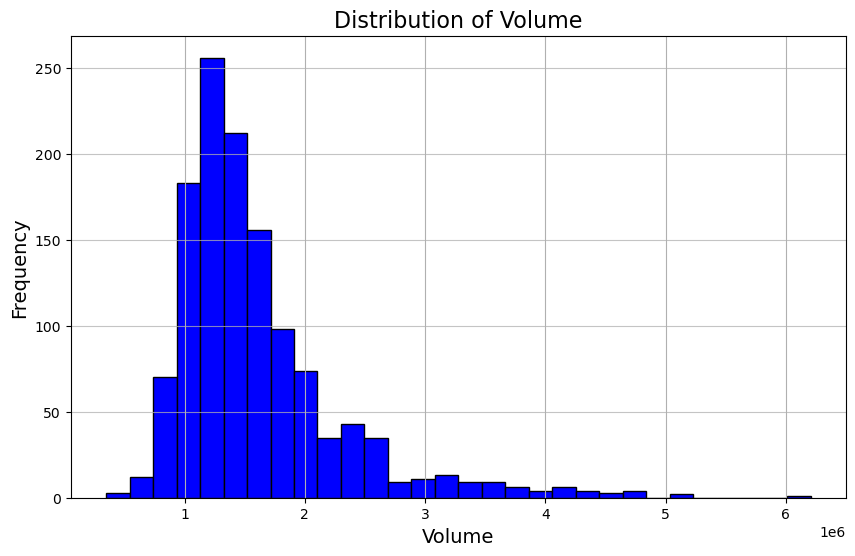

In [11]:
columns_to_plot = ['open', 'high', 'low', 'close', 'volume']
for column in columns_to_plot:
    plt.figure(figsize=(10, 6))
    df[column].hist(bins=30, color='blue', edgecolor='black')
    plt.title(f'Distribution of {column.capitalize()}', fontsize=16)
    plt.xlabel(column.capitalize(), fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.grid(axis='y', alpha=0.75)
    plt.show()

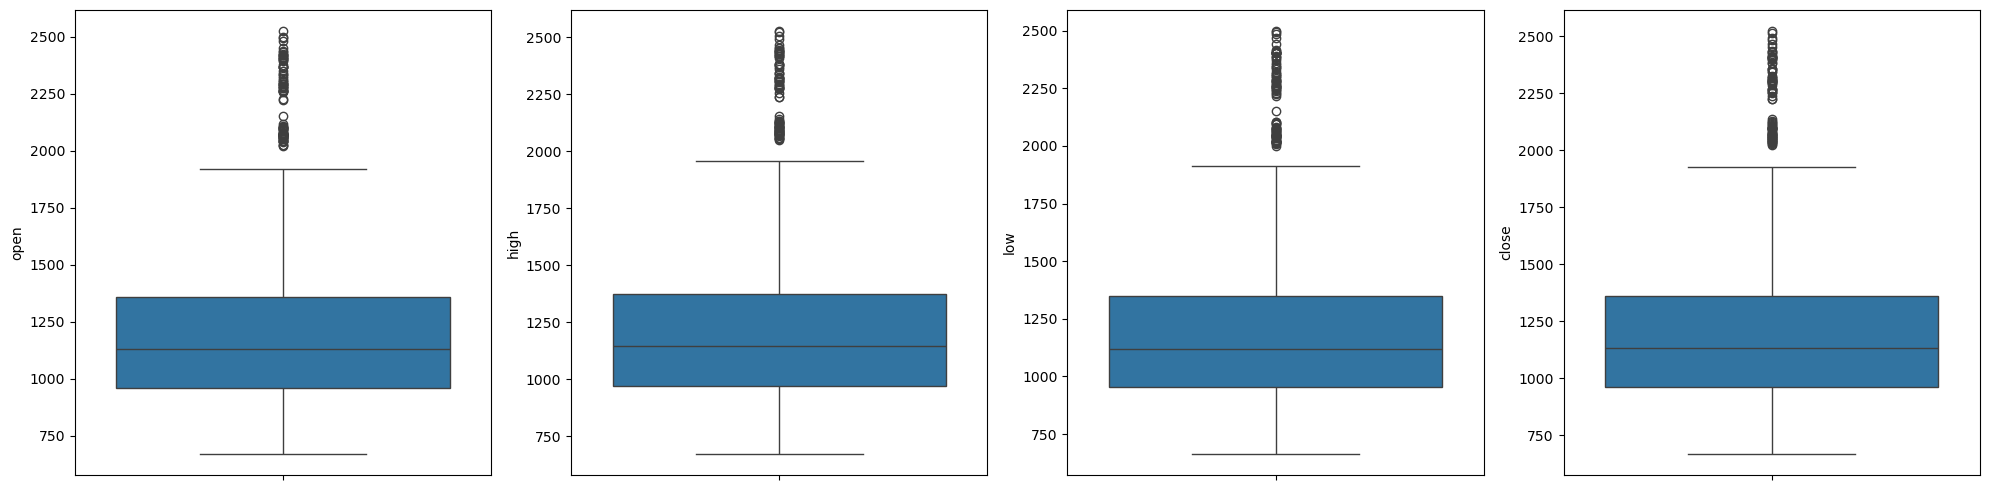

In [12]:
f, axes = plt.subplots(1, 4, figsize=(20,5))
sns.boxplot(y='open', data=df, ax=axes[0])
sns.boxplot(y='high', data=df, ax=axes[1])
sns.boxplot(y='low', data=df, ax=axes[2])
sns.boxplot(y='close', data=df, ax=axes[3])
plt.tight_layout()
plt.show()

In [13]:
scaler = StandardScaler()


why standard deviation ?

x_scaled= x−μ/standard_deviation

This scales the features to have a mean of 0 and a standard deviation of 1, ensuring that the model treats all features equally.

Neural networks often initialize weights using distributions (e.g., Gaussian or uniform) whose standard deviation depends on the number of inputs/outputs in a layer (e.g., He initialization or Xavier initialization).
Why?
Proper weight initialization ensures that gradients neither explode nor vanish during backpropagation. The standard deviation ensures the network starts training with appropriately scaled activations.



Introduced By: Xavier Glorot and Yoshua Bengio in 2010.
Purpose: Designed for activation functions like sigmoid or tanh. These functions tend to squash outputs into small ranges, making them susceptible to vanishing gradients.
Key Idea: The weights are initialized so that the variance of activations remains the same across layers, ensuring stable forward and backward propagation.


Introduced By: Kaiming He et al. in 2015.
Purpose: Specifically designed for activation functions like ReLU and its variants, which are more prone to exploding gradients if not initialized properly.
Key Idea: ReLU activation passes only positive values, so the variance of activations can increase. He initialization adjusts for this by scaling the weights more appropriately.



In regression, the standard deviation of residuals (errors) helps assess model performance:
The residual standard deviation quantifies how well the model fits the data.
A smaller standard deviation indicates that the model predictions are closer to the true values.



A small standard deviation indicates that the model's predictions are close to the real values because it reflects low variability or spread in the errors (residuals) between the predicted and actual values.
​


In [14]:
scaled_data = scaler.fit_transform(df.select_dtypes(include=['number']))

scaled_df = pd.DataFrame(scaled_data, columns=df.select_dtypes(include=['number']).columns)

df[df.select_dtypes(include=['number']).columns] = scaled_df

In [15]:
df.head()

,date,close,high,low,open,volume
0,2016-06-14,-1.299770,-1.303405,-1.296941,-1.304701,-0.424763
1,2016-06-15,-1.298074,-1.302088,-1.285875,-1.298110,-0.556347
2,2016-06-16,-1.320413,-1.318427,-1.322983,-1.308808,0.547447
3,2016-06-17,-1.369058,-1.338638,-1.362094,-1.325183,2.588274
4,2016-06-20,-1.363865,-1.355003,-1.348998,-1.351027,0.691275


In [16]:
df.describe()

,close,high,low,open,volume
count,1.258000e+03,1.258000e+03,1.258000e+03,1.258000e+03,1.258000e+03
mean,2.259277e-16,-2.259277e-16,1.807422e-16,-2.259277e-16,1.129639e-16
std,1.000398e+00,1.000398e+00,1.000398e+00,1.000398e+00,1.000398e+00
min,-1.430283e+00,-1.432904e+00,-1.428565e+00,-1.423667e+00,-1.803599e+00
25%,-6.668248e-01,-6.676877e-01,-6.655475e-01,-6.703091e-01,-6.152704e-01
50%,-2.188446e-01,-2.155197e-01,-2.278272e-01,-2.200154e-01,-2.716553e-01
75%,3.765269e-01,3.792145e-01,3.813285e-01,3.814181e-01,3.026501e-01
max,3.406440e+00,3.354421e+00,3.417916e+00,3.425782e+00,6.619475e+00


In [17]:
figure = go.Figure(data=[go.Candlestick(x=df["date"],
                                        open=df["open"], high=df["high"],
                                        low=df["low"], close=df["close"])])

figure.update_layout(title="Google Stock Price Analysis after scalling", xaxis_rangeslider_visible=False)
figure.show()

In [18]:
x=df[['open','high','low','volume']].values
y=df['close'].values

In [19]:
X_train_full, X_test, y_train_full, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=1)



In [20]:
X_train.shape[1]

4

In [21]:
model_dropout = models.Sequential([
    layers.Dense(64, activation='relu', input_dim=X_train.shape[1]),
    layers.Dropout(0.6),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.4),
    layers.Dense(1)
])


In [22]:
optimizer = Adam(learning_rate=1e-4)
model_dropout.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])

# Train the model
history_dropout = model_dropout.fit(X_train, y_train, epochs=50, batch_size=32, 
                                    validation_data=(X_val, y_val), verbose=1)

Epoch 1/50
26/26 [==============================] - 1s 19ms/step - loss: 0.9174 - mae: 0.6729 - val_loss: 0.7292 - val_mae: 0.5965
Epoch 2/50
26/26 [==============================] - 0s 5ms/step - loss: 0.8181 - mae: 0.6324 - val_loss: 0.6453 - val_mae: 0.5565
Epoch 3/50
26/26 [==============================] - 0s 4ms/step - loss: 0.6669 - mae: 0.5852 - val_loss: 0.5696 - val_mae: 0.5179
Epoch 4/50
26/26 [==============================] - 0s 7ms/step - loss: 0.6822 - mae: 0.5714 - val_loss: 0.5032 - val_mae: 0.4826
Epoch 5/50
26/26 [==============================] - 0s 4ms/step - loss: 0.6213 - mae: 0.5366 - val_loss: 0.4518 - val_mae: 0.4518
Epoch 6/50
26/26 [==============================] - 0s 8ms/step - loss: 0.5996 - mae: 0.5192 - val_loss: 0.4036 - val_mae: 0.4232
Epoch 7/50
26/26 [==============================] - 0s 9ms/step - loss: 0.5403 - mae: 0.5038 - val_loss: 0.3578 - val_mae: 0.3958
Epoch 8/50
26/26 [==============================] - 0s 14ms/step - loss: 0.4830 - mae: 0.

In [23]:
test_loss_dropout = model_dropout.evaluate(X_test, y_test)
y_train_pred_dropout = model_dropout.predict(X_train)
y_test_pred_dropout = model_dropout.predict(X_test)

train_r2_dropout = r2_score(y_train, y_train_pred_dropout)
test_r2_dropout = r2_score(y_test, y_test_pred_dropout)

8/8 [==============================] - 0s 1ms/step


In [24]:
model_no_dropout = models.Sequential([
    layers.Dense(64, activation='relu', input_dim=X_train.shape[1]),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])


In [25]:
model_no_dropout.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])


In [26]:
history_no_dropout = model_no_dropout.fit(X_train, y_train, epochs=50, batch_size=32, 
                                          validation_data=(X_val, y_val), verbose=1)


Epoch 1/50
26/26 [==============================] - 2s 14ms/step - loss: 0.6035 - mae: 0.5921 - val_loss: 0.2168 - val_mae: 0.3409
Epoch 2/50
26/26 [==============================] - 0s 4ms/step - loss: 0.0920 - mae: 0.2079 - val_loss: 0.0289 - val_mae: 0.1105
Epoch 3/50
26/26 [==============================] - 0s 5ms/step - loss: 0.0140 - mae: 0.0795 - val_loss: 0.0113 - val_mae: 0.0714
Epoch 4/50
26/26 [==============================] - 0s 4ms/step - loss: 0.0076 - mae: 0.0604 - val_loss: 0.0080 - val_mae: 0.0611
Epoch 5/50
26/26 [==============================] - 0s 7ms/step - loss: 0.0056 - mae: 0.0514 - val_loss: 0.0061 - val_mae: 0.0537
Epoch 6/50
26/26 [==============================] - 0s 5ms/step - loss: 0.0044 - mae: 0.0457 - val_loss: 0.0049 - val_mae: 0.0486
Epoch 7/50
26/26 [==============================] - 0s 4ms/step - loss: 0.0036 - mae: 0.0417 - val_loss: 0.0041 - val_mae: 0.0455
Epoch 8/50
26/26 [==============================] - 0s 13ms/step - loss: 0.0031 - mae: 0.

In [27]:
test_loss_no_dropout = model_no_dropout.evaluate(X_test, y_test)
y_train_pred_no_dropout = model_no_dropout.predict(X_train)
y_test_pred_no_dropout = model_no_dropout.predict(X_test)

train_r2_no_dropout = r2_score(y_train, y_train_pred_no_dropout)
test_r2_no_dropout = r2_score(y_test, y_test_pred_no_dropout)

8/8 [==============================] - 0s 2ms/step


In [28]:
train_r2_no_dropout

0.9990382711692918

In [29]:
test_r2_no_dropout

0.9990908800008317

In [30]:
train_r2_dropout

0.9269690594201604

In [31]:
test_r2_dropout

0.9308774812976187

Reasons Why Test Accuracy Can Be Greater Than Training Accuracy:
Regularization Effects:

If your model is using regularization techniques (e.g., L1/L2 regularization, dropout), it may perform better on unseen data (test set) by reducing overfitting on the training data.
Regularization penalizes overly complex models and can make them generalize better.

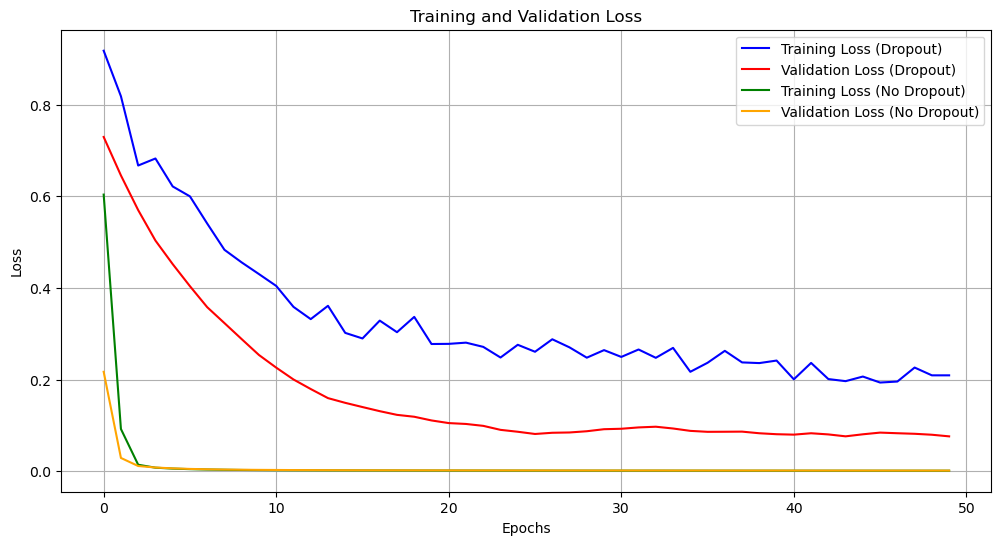

In [32]:
plt.figure(figsize=(12, 6))
plt.plot(history_dropout.history['loss'], label='Training Loss (Dropout)', color='blue')
plt.plot(history_dropout.history['val_loss'], label='Validation Loss (Dropout)', color='red')
plt.plot(history_no_dropout.history['loss'], label='Training Loss (No Dropout)', color='green')
plt.plot(history_no_dropout.history['val_loss'], label='Validation Loss (No Dropout)', color='orange')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

8/8 [==============================] - 0s 2ms/step


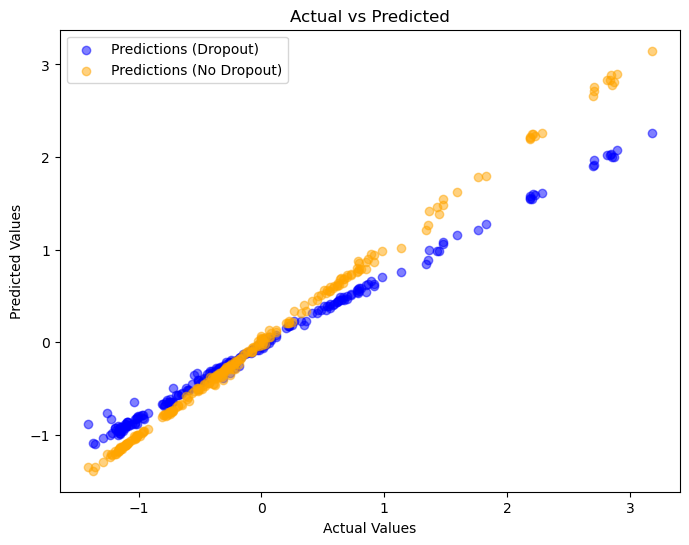

In [33]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, model_dropout.predict(X_test), label='Predictions (Dropout)', alpha=0.5, color='blue')
plt.scatter(y_test, model_no_dropout.predict(X_test), label='Predictions (No Dropout)', alpha=0.5, color='orange')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted")
plt.legend()
plt.show()

With Dropout: Although the training loss is higher, the validation loss is lower and more stable. This indicates that the model is not simply memorizing the training data but is learning patterns that generalize well to new, unseen data.

Without Dropout: The training loss decreases rapidly, suggesting the model is overfitting to the training data. However, the validation loss is higher and less stable, indicating poor generalization to new data.




Model with Dropout (Blue and Red Curves):
Training Loss (Blue Curve): The training loss is consistently higher than the model without dropout, indicating regularization through dropout. This suggests that the model avoids overfitting during training.
Validation Loss (Red Curve): The validation loss decreases and stabilizes at a reasonably low value, indicating good generalization to unseen data.
Model without Dropout (Green and Orange Curves):
Training Loss (Green Curve): The training loss is very low, approaching zero quickly. This indicates that the model without dropout fits the training data very well.
Validation Loss (Orange Curve): The validation loss is slightly lower than the dropout model's validation loss. However, the absence of dropout increases the risk of overfitting, especially if the dataset is not large or diverse.
